In [1]:
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = '/content/drive/My Drive/CS475/featured_dev.csv'
import pandas as pd

df = pd.read_csv(DATA_PATH)

Mounted at /content/drive


In [2]:
df = df.drop(columns=["Unnamed: 0"])
df.head()

,id,count,hate_speech,offensive_language,neither,class,tweet,00,000,02,...,length,count_chars,count_terms,count_unique_terms,count_words,count_syl,avg_svl,retweet.1,ease_score,grade_level
0,12371,3,0,1,2,2,Jihadis Turn Washington National Cathedral Int...,0.0,0.0,0.0,...,109.0,109.0,16.0,15.0,15.0,25.0,0.2294,1.0,44.41,9.6
1,21459,3,2,1,0,0,Soetoro/Obama is moving the country #Forward w...,0.0,0.0,0.0,...,139.0,139.0,23.0,20.0,23.0,34.0,0.2446,0.0,78.25,4.8
2,5963,3,0,3,0,1,@dan1ellep And they&#8217;re retarded as fuck ...,0.0,0.0,0.0,...,146.0,146.0,25.0,23.0,24.0,32.0,0.2192,0.0,73.51,8.7
3,7890,3,1,2,0,1,Almost got in a fight with a southwest faggot ...,0.0,0.0,0.0,...,65.0,65.0,13.0,12.0,13.0,18.0,0.2769,0.0,75.20,6.0
4,11387,3,0,3,0,1,I wish my brother would stop bringing dirty bi...,0.0,0.0,0.0,...,63.0,63.0,12.0,11.0,12.0,15.0,0.2381,1.0,84.68,4.4


In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
cluster_df = df.copy()
cluster_df.drop(columns=["count","hate_speech","offensive_language","neither","class","tweet","id"])

,00,000,02,0221,0sbaby4life,10,100,1000,100k,100s,...,length,count_chars,count_terms,count_unique_terms,count_words,count_syl,avg_svl,retweet.1,ease_score,grade_level
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,109.0,109.0,16.0,15.0,15.0,25.0,0.2294,1.0,44.41,9.6
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,139.0,139.0,23.0,20.0,23.0,34.0,0.2446,0.0,78.25,4.8
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,146.0,146.0,25.0,23.0,24.0,32.0,0.2192,0.0,73.51,8.7
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65.0,65.0,13.0,12.0,13.0,18.0,0.2769,0.0,75.20,6.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,63.0,63.0,12.0,11.0,12.0,15.0,0.2381,1.0,84.68,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,112.0,112.0,22.0,19.0,22.0,26.0,0.2321,0.0,82.99,7.2
2474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,29.0,6.0,5.0,5.0,6.0,0.2069,0.0,100.24,0.5
2475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,84.0,84.0,11.0,11.0,11.0,14.0,0.1667,0.0,83.83,2.7
2476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24.0,24.0,5.0,5.0,5.0,5.0,0.2084,0.0,92.80,1.3


In [5]:
import numpy as np
cluster_df1 = cluster_df.select_dtypes(include=np.number)
cluster_df1= cluster_df1.drop(columns=["id"])
cluster_array = cluster_df1.to_numpy()

In [6]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=500,random_state=42)

In [7]:
kmeans.fit(cluster_array)

KMeans(init='random', max_iter=500, n_clusters=3, random_state=42)

In [8]:
kmeans.n_iter_

22

In [9]:
final_array = kmeans.predict(cluster_array)

(array([700., 888., 890.]), array([0, 1, 2, 3]), <a list of 3 Patch objects>)

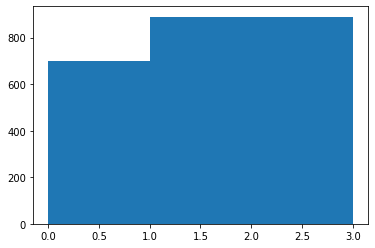

In [10]:
import matplotlib.pyplot as plt
list_of_colors = ["blue","red","green"]
plt.hist(final_array,bins=[0,1,2,3])

In [11]:
dev_result = df["class"].to_numpy()

(array([ 134., 1960.,  384.]),
 array([0, 1, 2, 3]),
 <a list of 3 Patch objects>)

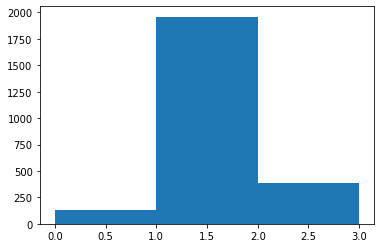

In [12]:
plt.hist(dev_result,bins=[0,1,2,3])